# Лабораторная работа №6. Оценка и улучшение качества модели

### 2. Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

weights:

    Определяет, как взвешиваются голоса ближайших соседей.
        'uniform': Все соседи имеют одинаковый вес.
        'distance': Вес соседа обратно пропорционален расстоянию до него, то есть ближние соседи оказывают большее влияние.

metric:

    Метрика, используемая для измерения расстояния между точками.
        'euclidean': Евклидово расстояние (корень из суммы квадратов разностей координат).
        'manhattan': Манхэттенское расстояние (сумма модулей разностей координат).
        'minkowski': Расстояние Минковского, обобщающее предыдущие метрики. Оно позволяет использовать параметр p, который неявно равен 2 (евклидовое расстояние) или 1 (манхэттенское).

Лучшие параметры:{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Лучшая точность (GridSearchCV): 0.986
Точность на тестовом наборе: 0.987
Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



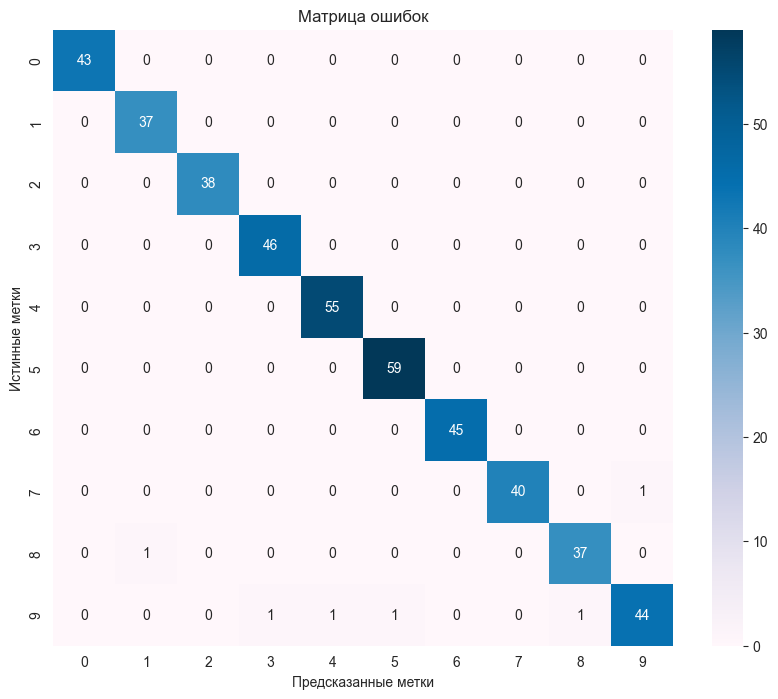

Качество модели KNeighborsClassifier на наборе данных digits (перекрестная проверка):
Средняя точность: 0.966
Отклонение: 0.011
Точности по каждой итерации: [0.95555556 0.95833333 0.96935933 0.98607242 0.96100279]


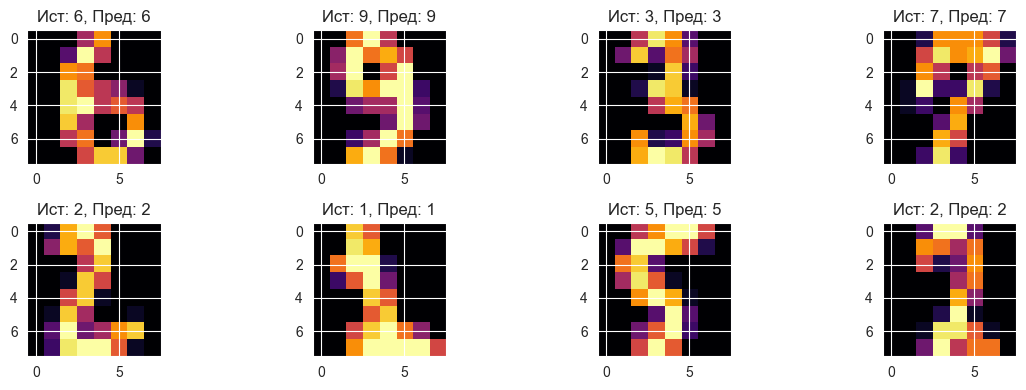

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_clf = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры:{grid_search.best_params_}"+
      f"\nЛучшая точность (GridSearchCV): {grid_search.best_score_:.3f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Точность на тестовом наборе: {accuracy_score(y_test, y_pred):.3f}")

print("Отчет классификации:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.show()

scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Качество модели KNeighborsClassifier на наборе данных digits (перекрестная проверка):")
print(f"Средняя точность: {scores.mean():.3f}" +
      f"\nОтклонение: {scores.std():.3f}"+
      f"\nТочности по каждой итерации: {scores}")
plt.figure(figsize=(12, 4))
for index, (image, label, pred) in enumerate(zip(X_test[:8], y_test[:8], y_pred[:8])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image.reshape(8, 8), cmap='inferno')
    plt.title(f"Ист: {label}, Пред: {pred}")
    #plt.axis('off')
plt.tight_layout()
plt.show()


### 3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск

#### a. Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint)

#### b.	Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)

#### c.	Преобразовать категориальные данные в числовые, используя panadas.get_dummies

#### d.	Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)

#### e.	Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)

#### f.	Проверить оценку модели

#### g.	Сделать предсказание на случайных данных

#### h.	Улучшить модель согласно примерам лекций 9-10 и материала лабораторной работы